In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Read data we calculated from csv and seperate the whole dataset into "acc" which contains five different accents with six different text types and "spd" which contains five different speeds with five different text types

In [3]:
df = pd.read_csv ('all_wer.csv')
print (df)
acc = df[0:30]
spd = df[30:]

    Unnamed: 0  Text Type    Accent  Speed       wer
0            0          1    French    1.0  0.633663
1            1          2    French    1.0  0.481481
2            2          3    French    1.0  0.666667
3            3          4    French    1.0  0.426230
4            4          5    French    1.0  0.457944
5            5          1  Japanese    1.0  0.742574
6            6          2  Japanese    1.0  0.829630
7            7          3  Japanese    1.0  0.803922
8            8          4  Japanese    1.0  0.672131
9            9          5  Japanese    1.0  0.803738
10          10          1    Korean    1.0  0.801980
11          11          2    Korean    1.0  0.725926
12          12          3    Korean    1.0  0.882353
13          13          4    Korean    1.0  0.573770
14          14          5    Korean    1.0  0.616822
15          15          1   Spanish    1.0  0.732673
16          16          2   Spanish    1.0  0.414815
17          17          3   Spanish    1.0  0.

create two boxplots to visualize the word error rate (wer) for different accent and speed

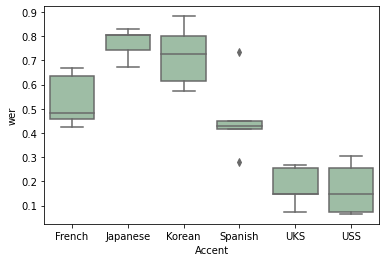

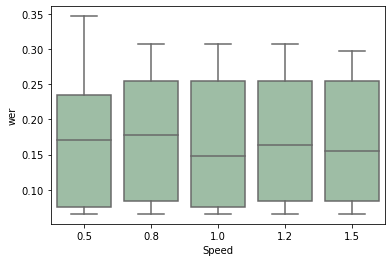

In [4]:
ax = sns.boxplot(x='Accent', y='wer', data=acc, color='#99c2a2')
plt.show()
ax = sns.boxplot(x='Speed', y='wer', data=spd, color='#99c2a2')
plt.show()

We choose to conduct t-test for the Japanese and USS which are the accent with highest wer and lowest average wer respectively. The aim of t-test is to justify whether the difference of wer of Japanese and USS are significant

In [14]:
from scipy.stats import ttest_ind

JPN = acc[acc['Accent']=='Japanese']
USS = acc[acc['Accent']=='USS']

ttest_ind(JPN['wer'], USS['wer'])

Ttest_indResult(statistic=10.731867150782465, pvalue=4.997618110068202e-06)

We next conduct t-test for the speed 0.8 and 1.0 which are the speed with highest wer and lowest average wer respectively. The aim of t-test is to justify whether the difference of wer of 0.8 and 1.0 are significant

In [8]:
lowspd = spd[spd['Speed']==0.8]
highspd = spd[spd['Speed']==1.0]

ttest_ind(lowspd['wer'], highspd['wer'])

Ttest_indResult(statistic=0.11594380607969237, pvalue=0.9105546824313931)

Then, we conduct the Ordinary Least Squares model for wer ~ C(Speed)+C(Accent) where word error rate is the dependent variable, speed and accent are two categorical independent variables. Moreover, we create ANOVA table.

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
# Ordinary Least Squares (OLS) model
model = ols('wer ~ C(Speed)+C(Accent)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Speed),0.000367,4.0,0.007592,9.998809e-01
C(Accent),2.050341,5.0,33.954670,3.324150e-14
Residual,0.543462,45.0,NaN,NaN


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wer   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     26.39
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.07e-15
Time:                        02:11:30   Log-Likelihood:                 48.929
No. Observations:                  55   AIC:                            -77.86
Df Residuals:                      45   BIC:                            -57.79
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5416      0.078      6.970      0.000       0.385       0.698
C(Speed)[T.0.8]          -0.0006      0.070     -0.009      0.993      -0.141       0.139
C(Speed)[T.1.0]          -0.0084      0.060     -0.140      0.889      -0.130       0.113
C(Speed)[T.1.2]          -0.0036      0.070     -0.052      0.959      -0.144       0.136
C(Speed)[T.1.5]          -0.0071      0.070     -0.102      0.919      -0.147       0.133
C(Accent)[T.Japanese]     0.2372      0.070      3.413      0.001       0.097       0.377
C(Accent)[T.Korean]       0.1870      0.070      2.690      0.010       0.047       0.327
C(Accent)[T.Spanish]     -0.0718      0.070     -1.033      0.307      -0.212       0.068
C(Accent)[T.UKS]         -0.3547      0.070     -5.103      0.000      -0.495      -0.215
C(Accent)[T.USS]         -0.3631      0.060     -6.033      0.000      -0.484      -0.242
==============================================================================
Omnibus:                        2.872   Durbin-Watson:                   2.532
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.437
Skew:                           0.402   Prob(JB):                        0.296
Kurtosis:                       2.353   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By fixing accent type which is only United State type, we run the regression for dependent word error rate and numerical independent variable speed. We hope to find how speed can influence the word error rate as speed increases.

In [12]:
model2 = ols('wer ~ Speed', data=spd).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
Speed,0.000147,1.0,0.014599,0.904879
Residual,0.231572,23.0,NaN,NaN


In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wer   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.01460
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.905
Time:                        02:11:34   Log-Likelihood:                 23.048
No. Observations:                  25   AIC:                            -42.10
Df Residuals:                      23   BIC:                            -39.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1817      0.062      2.919      0.008       0.053       0.310
Speed         -0.0071      0.059     -0.121      0.905      -0.129       0.115
==============================================================================
Omnibus:                       11.023   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                2.498
Skew:                           0.239   Prob(JB):                        0.287
Kurtosis:                       1.527   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""